In [24]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [25]:
import numpy as np
from chainconsumer import ChainConsumer
#from corner import corner

In [26]:
! ls -lt /u/ki/swmclau2/des/PearceMCMC/*chain*cosmo*.npy

-rw-r--r-- 1 swmclau2 des     119007 Oct 30 11:43 /u/ki/swmclau2/des/PearceMCMC/20_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_alpha.npy
-rw-r--r-- 1 swmclau2 des      74007 Oct 30 11:11 /u/ki/swmclau2/des/PearceMCMC/20_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_logM1.npy
-rw-r--r-- 1 swmclau2 des     281504 Oct 30 11:06 /u/ki/swmclau2/des/PearceMCMC/20_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_H0.npy
-rw-r--r-- 1 swmclau2 des     471008 Oct 30 10:57 /u/ki/swmclau2/des/PearceMCMC/20_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_hod.npy
-rw-r--r-- 1 swmclau2 des    1760034 Oct 30 10:24 /u/ki/swmclau2/des/PearceMCMC/20_walkers_500_steps_chain_cosmo_zheng_xi_fixed_hod.npy
-rw-r--r-- 1 swmclau2 des    1000030 Oct 30 10:17 /u/ki/swmclau2/des/PearceMCMC/20_walkers_500_steps_chain_cosmo_zheng_xi_fixed_cosmo.npy
-rw-r--r-- 1 swmclau2 des 1033800030 Oct 30 09:22 /u/ki/swmclau2/des/PearceMCMC/1000_walkers_20000_steps_chain_cosmo_zheng_xi_fixed_cosmo.npy
-rw-r--r-- 1 swmclau2 des 3359748

In [27]:
! du /u/ki/swmclau2/des/PearceMCMC/*chain*cosmo*.npy -sh

2.6G	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_10000_steps_chain_cosmo_zheng_xi.npy
2.6G	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_10000_steps_chain_cosmo_zheng_xi_2.npy
2.6G	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_10000_steps_chain_cosmo_zheng_xi_3.npy
987M	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_20000_steps_chain_cosmo_zheng_xi_fixed_cosmo.npy
3.2G	/u/ki/swmclau2/des/PearceMCMC/1000_walkers_20000_steps_chain_cosmo_zheng_xi_newhp.npy
27M	/u/ki/swmclau2/des/PearceMCMC/100_walkers_1000_steps_chain_cosmo_zheng_xi.npy
2.7M	/u/ki/swmclau2/des/PearceMCMC/100_walkers_100_steps_chain_cosmo_zheng_xi.npy
264M	/u/ki/swmclau2/des/PearceMCMC/200_walkers_5000_steps_chain_cosmo_zheng_xi.npy
276K	/u/ki/swmclau2/des/PearceMCMC/20_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_H0.npy
120K	/u/ki/swmclau2/des/PearceMCMC/20_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_alpha.npy
464K	/u/ki/swmclau2/des/PearceMCMC/20_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_hod.npy
76K	/u/ki/swmclau2/des/Pearce

In [28]:
#fname = 'ab_sham_chain.npy'
#fname = '/u/ki/swmclau2/des/PearceMCMC/chain.npy'
fname = '/u/ki/swmclau2/des/PearceMCMC/20_walkers_5000_steps_chain_cosmo_zheng_xi_fixed_alpha.npy'

In [29]:
chain = np.genfromtxt(fname)

In [30]:
chain.shape

(4780,)

In [31]:
n_walkers = 20
n_params = chain.shape[1] if len(chain.shape) > 1 else 1

In [32]:
#c = chain.reshape((n_walkers, -1, n_params))
n_burn = 0
chain = chain[n_walkers*n_burn:]#, :]
#c = chain.reshape((-1, n_walkers, n_params))

#chain = c[:,:, :].reshape((-1, n_params))
print chain.shape, chain.shape[0]/n_walkers

(4780,) 239


In [33]:
MAP = chain.mean(axis = 0)
print MAP

0.8109811840431546


In [34]:
param_names = [r'$N_{eff}$', r'$\log(M_0)$',r'$\log(M_1)$', r'$H_0$',r'$w_0$', r'$\ln(10A_s)$',  r'$\Omega_c h^2$',
               r'$\sigma_{\log M }$', r'$\alpha$',  r'$n_s$', r'$\Omega_b h^2$']

In [35]:
hod_param_names = [r'$\log(M_1)$',r'$\log(M_0)$', r'$\sigma_{\log M }$',r'$\alpha$' ]
cosmo_param_names = [r'$N_{eff}$', r'$H_0$',r'$w_0$',r'$\Omega_c h^2$',r'$\ln(10A_s)$',r'$n_s$', r'$\Omega_b h^2$']

In [36]:
chain.shape

(4780,)

In [37]:
#fixed some params
#param_names = [r'$\log{M_{min}}$',r'$\sigma_{log{M}}$',r'$\log{M_1}$', r'$\alpha$']#, r'$\log{M_0}$', r'$\log{M_1}$', r'$\alpha$']

In [38]:
c = ChainConsumer()
c.add_chain(chain, walkers=n_walkers)#, parameters = cosmo_param_names)
c.configure(statistics='cumulative')

In [39]:
#true_vals = np.array([12.9390382,12.51024343,  14.36144524,   0.73766725,  1.06822384])
#true_vals = np.array([12.9390382,0.0, 12.51024343,  14.36144524, 0.0,  0.73766725,  1.06822384])

In [40]:
from pearce.mocks import cat_dict
cosmo_params = {'simname':'testbox', 'boxno': 3, 'realization':0, 'scale_factors':[1.0], 'system': 'long'}
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [41]:
cpv = cat._get_cosmo_param_names_vals()

print  {key: val for key, val in zip(cpv[0], cpv[1])}

{'Neff': 3.7, 'H0': 70.7317, 'w0': -1.13151, 'omch2': 0.12283, 'ln10As': 3.11395, 'ns': 0.953515, 'ombh2': 0.0217629}


In [42]:
#cosmo_true_vals = [0.12283, 0.021762, 3.11395, 0.953515, 70.7317, 3.7, -1.13151]
cosmo_true_vals = cpv[1]

In [43]:
emulation_point = [('logM0', 14.0), ('sigma_logM', 0.2),
                    ('alpha', 1.083),('logM1', 13.7)]

In [44]:
hod_true_vals = [13.7, 14.0, 0.2, 1.083]

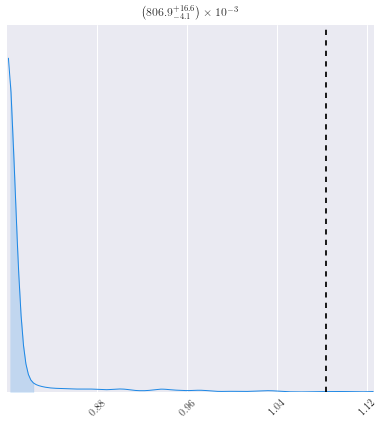

In [ ]:
fig = c.plotter.plot(figsize=(6,6), truth = np.array([1.083]))# , parameters = cosmo_param_names, truth = cosmo_true_vals)# parameters = [param_names[i] for i in (1, 4)])
                    #, truth = true_vals)
fig.show()

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

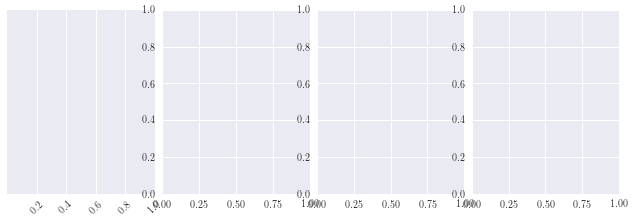

In [ ]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10, 3) ,parameters = hod_param_names, truth = hod_true_vals)
fig.show()

In [ ]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10, 6) , parameters = cosmo_param_names, truth = cosmo_true_vals)
fig.show()

In [ ]:
gelman_rubin_converged = c.diagnostic.gelman_rubin()
print gelman_rubin_converged

In [ ]:
np.sqrt(np.diag(c.analysis.get_covariance()[1]))

In [ ]:
summary  = c.analysis.get_summary()
for key, val in summary.iteritems():
    print key, val[1]

In [ ]:
MAP = np.array([summary[p][1] for p in param_names])
print MAP

In [ ]:
print param_names